# 标签平滑总结及实现

### 一、什么是标签平滑  
1.标签平滑是损失函数的一种修正，简单解释是：他将神经网络的训练目标从‘1’调整为1-label_smoothing adjustment,这样使神经网络在训练的时候能够更加聚类，同时降低了神经网络的自信程度，降低了网络在小数据集上过拟合的现象。可以将其理解为一种正则化手段。  
2.论文可视化了label_smoothing在训练resnet时的作用：  
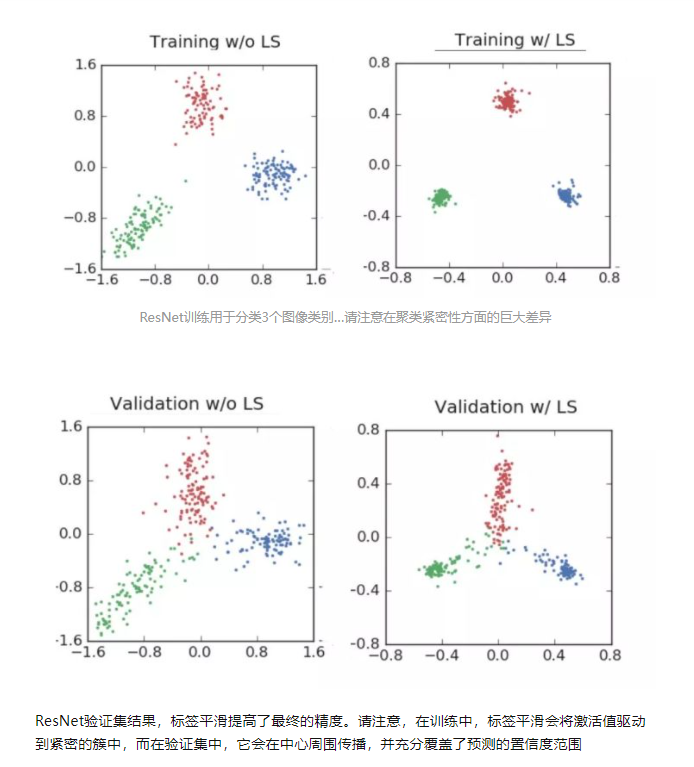  
3.标签平滑后的交叉熵损失  
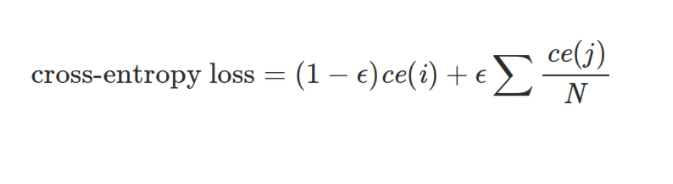  
N为物体分类的类别数量

### 二、标签平滑的pytorch实现

In [1]:
# 定义一个辅助函数，实现两个数值之间的线性组合
def linear_combination(x, y, epsilon):
    return epsilon*x+(1-epsilon)*y

# 利用标签平滑修改loss
from torch import nn
import torch.nn.functional as F


# 定义返回loss的形式
def reduce_loss(loss, reduction='mean'):
    return loss.mean() if reduction=='mean' else loss.sum() if reduction=='sum' else loss


# 定义标签平滑后的损失
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, epsilon:float=0.1, reduction='mean'):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.epsilon = epsilon
        self.reduction = reduction
    
    def forward(self, preds, target):
        n = preds.size()[-1]
        log_preds = F.log_softmax(preds, dim=-1)
        loss = reduce_loss(-log_preds.sum(dim=-1), self.reduction)
        nll = F.nll_loss(log_preds, target, reduction=self.reduction)
        return linear_combination(loss/n, nll, self.epsilon)

# 标签平滑在实际中的使用
criterion = LabelSmoothingCrossEntropy()

In [ ]:
# 测试
import torch
pred = torch.randn(10, 5)
target = torch.randint(0, 5, (10,))
criterion = nn.CrossEntropyLoss()
smoothing_criterion = LabelSmoothingCrossEntropy()

In [15]:
loss_1 = criterion(pred, target)
loss_1

tensor(2.4071)

In [17]:
loss_smoothing = smoothing_criterion(pred, target)
loss_smoothing

tensor(2.3687)